___
# Loading the data and libraries
___

In [ ]:
%load_ext autoreload
%autoreload 2

import os
import sys
import warnings

while any(marker in os.getcwd() for marker in ['workspace_capstone']):
    os.chdir("..")

sys.path.append('classes_and_functions_capstone')

current_directory = os.getcwd()
current_directory

In [2]:
# Importing external packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Importing custom-made functions and classes
from classes_and_functions_capstone.custom_functions_classes_capstone import (
    LogTransformer,
    plot_algo3d_interactive,
)

import warnings
warnings.filterwarnings("ignore")

In [3]:
raw_data = pd.read_csv(r'attachments_capstone\KIRC_gene_exp.csv')

In [4]:
raw_data.head()

,Unnamed: 0,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
0,TCGA-B0-5402-01,-0.613869,3.907610,-0.092480,-0.428222,-0.732195,-0.228208,-1.147002,-0.799435,-0.089858,...,-0.169414,0.710281,-0.201891,0.153669,0.068967,-0.449808,0.059252,-0.063909,0.328185,1.578171
1,TCGA-CJ-4634-01,1.150781,0.451041,-0.092480,-0.582534,-0.153104,0.172521,0.046365,-0.227903,0.352889,...,0.088788,-0.638642,0.265801,-0.645776,0.446156,0.172093,0.519404,-0.683210,-0.652565,-0.989972
2,TCGA-B0-4828-01,0.450394,0.096415,-0.061711,0.075810,-0.529892,-0.497759,1.062191,-0.057001,0.865147,...,0.153398,-0.635284,-0.628036,1.913753,1.137948,0.171959,-0.565262,0.371532,-0.924489,-0.475239
3,TCGA-CZ-5452-11,1.397206,0.478936,-0.092480,2.427314,0.385003,-0.140100,0.429928,-0.554670,-0.415514,...,0.013822,1.565750,-0.550874,-0.625024,-0.991979,-0.875701,-0.970794,-0.536241,2.851699,-0.766554
4,TCGA-B4-5835-01,-1.127536,-0.586795,-0.092480,-0.651031,-2.056976,1.756855,-1.152287,-0.954072,-0.415514,...,-0.113072,1.060696,-0.711862,-0.377746,-1.412339,-1.560296,-1.259452,1.117531,-0.983725,0.465267


---
# ***EDA***
---

In [5]:
raw_data.isnull().sum().sum()

0

In [6]:
raw_data.dtypes.value_counts()

float64    20530
object         1
Name: count, dtype: int64

In [7]:
numeric_columns = raw_data.iloc[:, 1:].columns

In [8]:
minimal_val = min(raw_data.describe().iloc[3, :])

In [9]:
log_pipeline = make_pipeline(
    LogTransformer(numeric_columns, minimal_val),
)
log_data = log_pipeline.fit_transform(raw_data)

In [10]:
log_data.head()

,Unnamed: 0,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
0,TCGA-B0-5402-01,1.745665,2.327394,1.832758,1.777552,1.724798,1.810806,1.648001,1.712743,1.833177,...,1.820374,1.953575,1.815100,1.871379,1.858257,1.773896,1.856741,1.837318,1.897885,2.069612
1,TCGA-CJ-4634-01,2.014151,1.916132,1.832758,1.751119,1.823012,1.874276,1.854726,1.810856,1.901581,...,1.861343,1.741332,1.888490,1.740081,1.915412,1.874211,1.926143,1.733490,1.738889,1.677771
2,TCGA-B0-4828-01,1.916036,1.862528,1.837668,1.859323,1.760215,1.765727,2.002260,1.838417,1.975293,...,1.871337,1.741921,1.743190,2.111102,2.012437,1.874190,1.754113,1.904361,1.689928,1.769572
3,TCGA-CZ-5452-11,2.046503,1.920228,1.832758,2.171439,1.906365,1.825111,1.913019,1.755944,1.779698,...,1.849620,2.068043,1.756600,1.743717,1.677396,1.698891,1.681347,1.759123,2.218690,1.718656
4,TCGA-B4-5835-01,1.651740,1.750379,1.832758,1.739158,1.455495,2.091918,1.646983,1.684454,1.779698,...,1.829458,2.002058,1.728415,1.786049,1.595591,1.565128,1.626124,2.009705,1.678937,1.918223


---
# ***Dimensionality Reduction***
---

### UMAP with $n =3$ on logdata

In [11]:
Umap2 = umap.UMAP(n_components=3)
raw_umap = Umap2.fit_transform(log_data[numeric_columns])

optimal_clusters = 2

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(raw_umap)

target_series = pd.Series(cluster_labels)

plot_algo3d_interactive(raw_umap, target_series, algo_name='UMAP', target_name='Clusters')


## ***UMAP with DBSCAN***

In [12]:
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan_clusters = dbscan.fit_predict(raw_umap)

# Plot clusters
dbscan_target = pd.Series(dbscan_clusters)

plot_algo3d_interactive(raw_umap, dbscan_target, 'UMAP', 'Clusters')

In [13]:
umap_data_dbscan = pd.DataFrame(raw_umap, columns=[[f'T-SNE {i}' for i in range(1, 4)]])

umap_data_dbscan = pd.concat([umap_data_dbscan, dbscan_target], axis=1)
umap_data_dbscan.columns = ['UMAP 1', 'UMAP 2', 'UMAP 3', 'CLUSTER']
umap_data_dbscan.head(3)

,UMAP 1,UMAP 2,UMAP 3,CLUSTER
0,15.008282,5.473657,15.205203,0
1,14.091130,5.906642,16.081787,0
2,13.610656,7.206419,14.091146,0


In [14]:
umap_data_dbscan_cluster0 = umap_data_dbscan[umap_data_dbscan['CLUSTER'] == 0]
umap_data_dbscan_cluster1 = umap_data_dbscan[umap_data_dbscan['CLUSTER'] == 1]
umap_data_dbscan_cluster2 = umap_data_dbscan[umap_data_dbscan['CLUSTER'] == 2]

The highest silhouette score: 0.6453119535079597 (Optimal clusters: 3)
The lowest Davies-Bouldin score: 0.45033873761440973 (Optimal clusters: 3)
The highest Calinski-Harabasz score: 458.7836258019492 (Optimal clusters: 29)


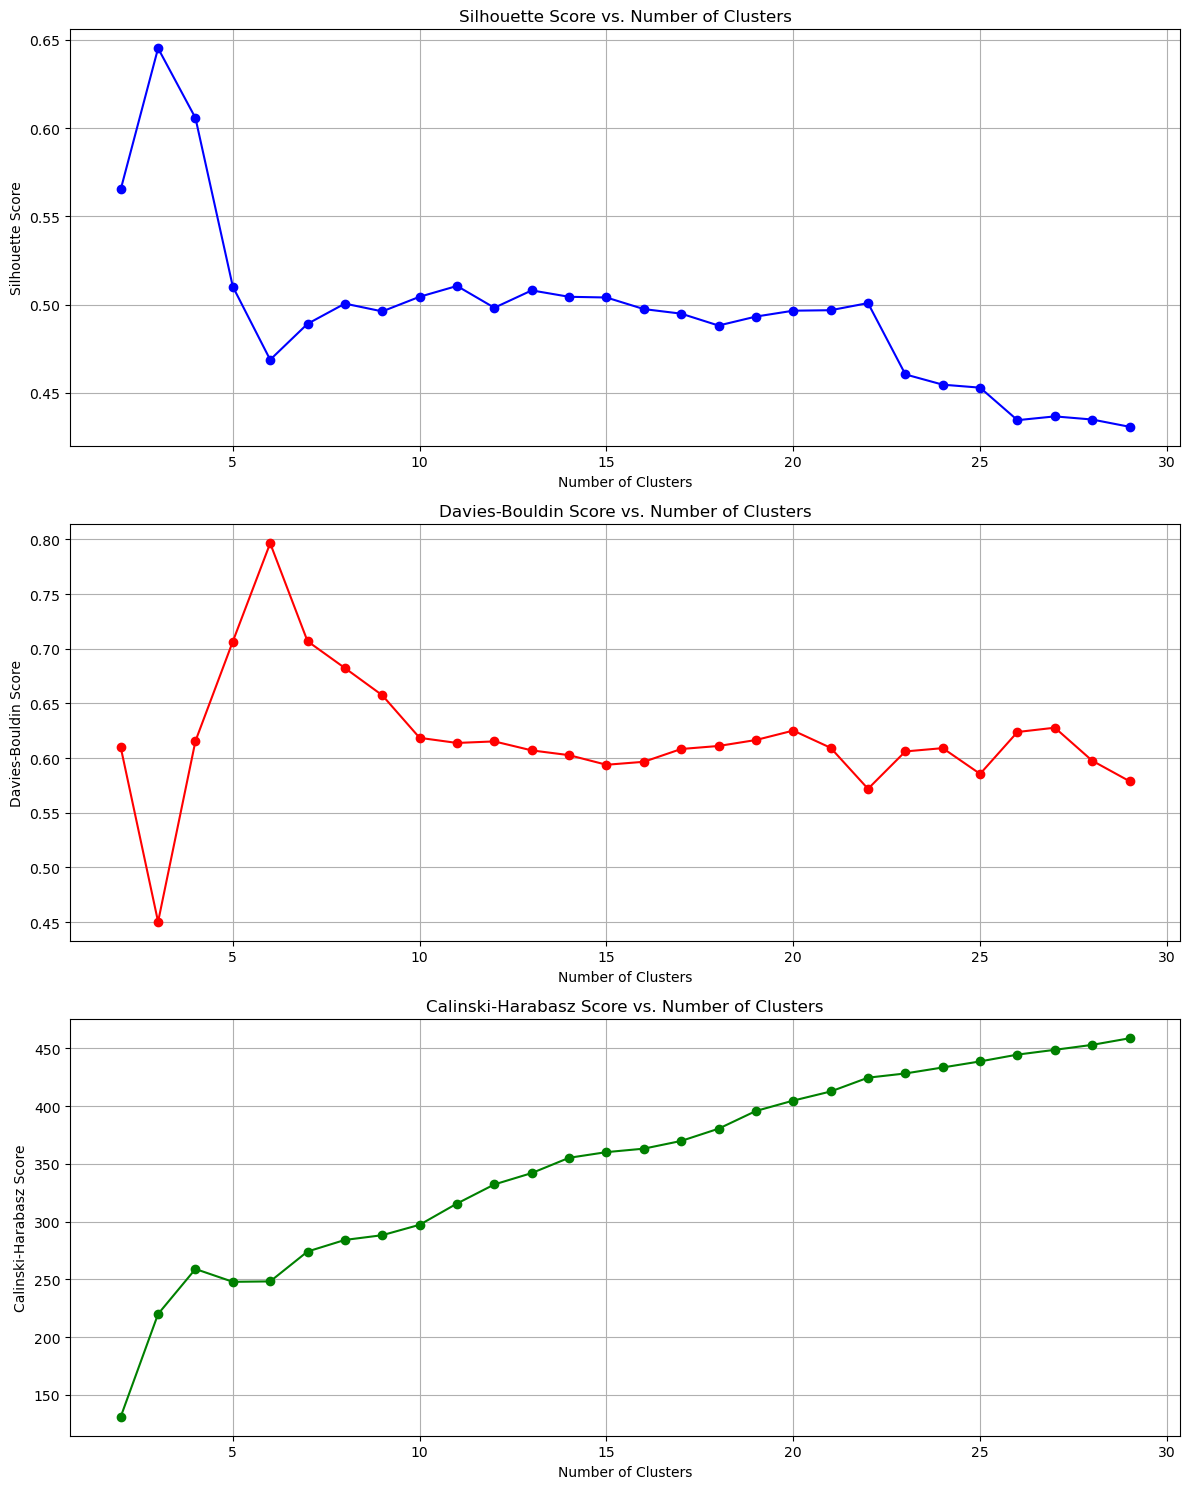

In [15]:
sil_scores = []
db_scores = []
ch_scores = []

search_range = range(2, 30)

for k in search_range:
    agglo = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = agglo.fit_predict(umap_data_dbscan_cluster1)
    
    sil_scores.append(silhouette_score(umap_data_dbscan_cluster1, labels))
    db_scores.append(davies_bouldin_score(umap_data_dbscan_cluster1, labels))
    ch_scores.append(calinski_harabasz_score(umap_data_dbscan_cluster1, labels))

max_sil_score = max(sil_scores)
optimal_clusters_sil = search_range[np.argmax(sil_scores)]

min_db_score = min(db_scores)
optimal_clusters_db = search_range[np.argmin(db_scores)]

max_ch_score = max(ch_scores)
optimal_clusters_ch = search_range[np.argmax(ch_scores)]

print(f"The highest silhouette score: {max_sil_score} (Optimal clusters: {optimal_clusters_sil})")
print(f"The lowest Davies-Bouldin score: {min_db_score} (Optimal clusters: {optimal_clusters_db})")
print(f"The highest Calinski-Harabasz score: {max_ch_score} (Optimal clusters: {optimal_clusters_ch})")

plt.figure(figsize=(12, 15))

plt.subplot(3, 1, 1)
plt.plot(search_range, sil_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(search_range, db_scores, marker='o', linestyle='-', color='r')
plt.title('Davies-Bouldin Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(search_range, ch_scores, marker='o', linestyle='-', color='g')
plt.title('Calinski-Harabasz Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.grid(True)

plt.tight_layout()
plt.show()


In [16]:
agglo_umap_cluster1 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = agglo_umap_cluster1.fit_predict(umap_data_dbscan_cluster1.iloc[:,:-1].to_numpy())
umap_cluster1_target = pd.Series(labels)

plot_algo3d_interactive(umap_data_dbscan_cluster1.iloc[:,:-1].to_numpy(), umap_cluster1_target, 'UMAP', 'Clusters')